In [2]:
%matplotlib inline
import numpy as np
import re
from matplotlib import pyplot as plt 

import sys 
sys.setrecursionlimit(4000000)

import pickle
import h5py





## Create dictionary of chromosome lengths (reference genome)

In [3]:

# CREATES DICTIONARY CHROMES_LEN WHICH CONTAINS CHROMOSOME NAMES AS KEYS AND LENGTH AS VALUES
f_ref = open('dm6.fa', 'r')
chroms_len = {}
current_chrom = ''
for i in f_ref:
    if '>chr' in i:
        if i not in chroms_len:
            #remove '>' and newline character from dictionary key 
            newchrom = i.translate(None, '> \n')
            
            # add new chromosome to dictionary, initialize length to 0
            chroms_len[newchrom] = 0
            print 'new chrom added:', newchrom
            current_chrom = newchrom
    else:
        # add length of line to most recently added chromosome's length
        chroms_len[current_chrom] += (len(i) - 1)  # \n character needs to be removed from count


new chrom added: chr2L
new chrom added: chr2R
new chrom added: chr3L
new chrom added: chr3R
new chrom added: chr4
new chrom added: chrM
new chrom added: chrUn_DS485919v1
new chrom added: chrUn_DS483755v1
new chrom added: chrUn_DS485425v1
new chrom added: chrUn_DS484861v1
new chrom added: chrUn_DS484484v1
new chrom added: chrUn_DS483705v1
new chrom added: chrUn_DS485490v1
new chrom added: chrUn_DS485998v1
new chrom added: chrUn_DS483873v1
new chrom added: chrUn_DS485608v1
new chrom added: chrUn_DS485270v1
new chrom added: chrUn_DS485979v1
new chrom added: chrUn_DS485398v1
new chrom added: chrUn_DS484139v1
new chrom added: chrUn_DS483906v1
new chrom added: chrUn_DS485760v1
new chrom added: chrUn_DS484191v1
new chrom added: chrUn_DS485340v1
new chrom added: chrUn_DS484489v1
new chrom added: chrUn_DS485495v1
new chrom added: chrUn_DS484923v1
new chrom added: chrUn_DS484663v1
new chrom added: chrUn_DS485390v1
new chrom added: chrUn_DS485130v1
new chrom added: chrUn_DS485995v1
new chrom adde

## MAJOR CHROMS: Create dictionary of chromosome lengths (reference genome)

In [12]:
major_chroms = ['chr2R', 'chr2L', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrY']

# CREATES DICTIONARY CHROMES_LEN WHICH CONTAINS CHROMOSOME NAMES AS KEYS AND LENGTH AS VALUES
f_ref = open('dm6.fa', 'r')
chroms_len = {}
current_chrom = ''
for i in f_ref:
    if '>chr' in i:
        if i not in chroms_len:
            #remove '>' and newline character from dictionary key 
            newchrom =i.translate(None, '> \n')
            if newchrom in major_chroms:
                # add new chromosome to dictionary, initialize length to 0
                chroms_len[newchrom] = 0
                print 'new chrom added:', newchrom
                current_chrom = newchrom
    else:
        if newchrom in major_chroms:
            chroms_len[newchrom] += (len(i) - 1)  # \n character needs to be removed from count

chroms_len

new chrom added: chr2L
new chrom added: chr2R
new chrom added: chr3L
new chrom added: chr3R
new chrom added: chr4
new chrom added: chrX
new chrom added: chrY


{'chr2L': 23513712,
 'chr2R': 25286936,
 'chr3L': 28110227,
 'chr3R': 32079331,
 'chr4': 1348131,
 'chrX': 23542271,
 'chrY': 3667352}

In [13]:
h5f = h5py.File('h5py_compressed/CHROMS_LEN.h5', 'w')
for chrom in chroms_len:
    h5f.create_dataset(chrom, data=chroms_len[chrom])
h5f.close()

## Creates a dict of chromosomes as arrays; values are read coverage

In [7]:
##### THIS CURRENTLY BREAKS AFTER 2000 LINES

# Initialize dictionary of chromosomes -- start with all 0's
chroms = {}
for chrom in chroms_len:
    chroms[chrom] = np.zeros(chroms_len[chrom])

# Open transcript sam file    
f = open('150415_SN651_0372_AH3N2YBCXX__Sample_H_L_M1_1Aligned.sortedByCoord.out.sam', 'r')

# Add each read from sam file to the chroms arrays
counter = 0
thrown_out = 0
for i in f:
    if not '@' in i:
        line_array = i.split("\t")
        mapped_chrom = line_array[2]
        if mapped_chrom in chroms_len: 
            start = int(line_array[3])
            read_len = len(line_array[9])
            end = start + read_len - 1
            if counter % 100000 == 0:
                print counter, mapped_chrom, start, end, read_len
            if end > chroms_len[mapped_chrom]-1:
                thrown_out += 1
            else: 
                for position in range(start-1, end):
                    chroms[mapped_chrom][position] += 1
    counter += 1




100000 chr2L 189523 189582 60
200000 chr2L 229214 229273 60
300000 chr2L 477187 477246 60
400000 chr2L 957197 957256 60
500000 chr2L 1651551 1651610 60
600000 chr2L 2224020 2224079 60
700000 chr2L 2781199 2781258 60
800000 chr2L 2929468 2929527 60
900000 chr2L 3366958 3367017 60
1000000 chr2L 4073345 4073404 60
1100000 chr2L 4422924 4422983 60
1200000 chr2L 4854631 4854690 60
1300000 chr2L 5124069 5124128 60
1400000 chr2L 5169785 5169844 60
1500000 chr2L 5178493 5178552 60
1600000 chr2L 5305708 5305767 60
1700000 chr2L 6083159 6083218 60
1800000 chr2L 6588640 6588699 60
1900000 chr2L 6925640 6925699 60
2000000 chr2L 7224369 7224428 60
2100000 chr2L 7674725 7674784 60
2200000 chr2L 8067320 8067379 60
2300000 chr2L 8218336 8218395 60
2400000 chr2L 8667252 8667311 60
2500000 chr2L 9284426 9284485 60
2600000 chr2L 9295485 9295544 60
2700000 chr2L 9712457 9712516 60
2800000 chr2L 9724844 9724903 60
2900000 chr2L 9794258 9794317 60
3000000 chr2L 9809602 9809661 60
3100000 chr2L 9877136 98771

## WRITING THE READS TO FILES

In [47]:
for key in chroms:
    h5f = h5py.File('h5py_compressed/reads_sampledata_' + key + '.h5', 'w')
    h5f.create_dataset('reads', data=chroms[key])
    h5f.close()


in order to access the reads from the compressed reads file ('reads' can now be accessed the same way as the array that was stored):

In [52]:
wantedchrom = 'chr2L'
readfile = h5py.File('h5py_compressed/reads_sampledata_' + wantedchrom + '.h5','r')
reads = readfile.get('reads')

In [54]:
type(chroms[key])

numpy.ndarray

## STUFF AS OF 6/2

In [6]:
readfile = h5py.File('../TEST_READS.h5','r')
reads = readfile.get('reads')

In [11]:
reads[100]

0.0

In [10]:
percentage_dropped = float(thrown_out)/46400000
percentage_dropped

NameError: name 'thrown_out' is not defined

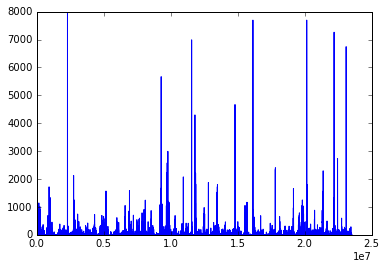

In [10]:
# Very rudimentary graph of reads from location 5000 to 8000
plt.plot(chroms['chr2L'][0:235137111])

In [11]:
max(chroms['chr2L'])

7955.0

In [ ]:
plt.subplot(2)

In [16]:
len(chroms_len)

1870

In [44]:
len(chroms_len)

1870

In [55]:
chroms_len['chr4']

1348131

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [20]:
if 'chrY_DS485892v1_random' in chroms_an:
    print 'hi'
else:
    print 'no'

hi


In [17]:
chroms_an['chrY_DS485423v1_random']

{0: set(),
 1: set(),
 2: set(),
 3: set(),
 4: set(),
 5: set(),
 6: set(),
 7: set(),
 8: set(),
 9: set(),
 10: set(),
 11: set(),
 12: set(),
 13: set(),
 14: set(),
 15: set(),
 16: set(),
 17: set(),
 18: set(),
 19: set(),
 20: set(),
 21: set(),
 22: set(),
 23: set(),
 24: set(),
 25: set(),
 26: set(),
 27: set(),
 28: set(),
 29: set(),
 30: set(),
 31: set(),
 32: set(),
 33: set(),
 34: set(),
 35: set(),
 36: set(),
 37: set(),
 38: set(),
 39: set(),
 40: set(),
 41: set(),
 42: set(),
 43: set(),
 44: set(),
 45: set(),
 46: set(),
 47: set(),
 48: set(),
 49: set(),
 50: set(),
 51: set(),
 52: set(),
 53: set(),
 54: set(),
 55: set(),
 56: set(),
 57: set(),
 58: set(),
 59: set(),
 60: set(),
 61: set(),
 62: set(),
 63: set(),
 64: set(),
 65: set(),
 66: set(),
 67: set(),
 68: set(),
 69: set(),
 70: set(),
 71: set(),
 72: set(),
 73: set(),
 74: set(),
 75: set(),
 76: set(),
 77: set(),
 78: set(),
 79: set(),
 80: set(),
 81: set(),
 82: set(),
 83: set(),
 8

In [ ]:
seg_types = {'CDS': 1, 
             'start_codon': 2, 
             'stop_codon': 3,
             'exon': 4,
             '5UTR': 5, 
             '3UTR': 6, 
             'inter': 7, 
             'inter_CNS': 8, 
             'intron_CNS': 9]

In [ ]:
chrom = 'chr2L'
start = 5000
end = 8000

def MAKEPLOTS (chrom, start, end):
    
    reads = plt.subplot(2,1,1)
    reads.plot(chroms[chrom][start:end])
    reads.axes.get_xaxis().set_visible(False)
    
    
    an_row1 =  
    
    plt.subplot(2,1,2)
    

    
MAKEPLOTS(chrom, start, end)

In [51]:
import pickle

chrom = 'chrY_DS485014v1_random'
filename = chrom + '.pickle'

with open(filename, 'wb') as handle:
  pickle.dump(chroms_an[chrom], handle)


In [14]:
with open('dm6_annotations/chr4.pickle', 'rb') as handle:
  b = pickle.load(handle)

In [20]:
b[891]

[('exon', 'FBtr0346692.1')]

In [16]:
with open('CHROMS_reads.pickle', 'rb') as handle:
  cr = pickle.load(handle)

In [19]:
cr['chr2L'][70000]

22.0

In [10]:
len(chroms)

1870

In [56]:
len(b)

1283

In [57]:
b[1] = ('test1', 'test2')

In [58]:
b

{0: [],
 1: ('test1', 'test2'),
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [],
 84: [],
 85: [],
 86: [],
 87: [],
 88: [],
 89: [],
 90: [],
 91: [],
 92: [],
 93: [],
 94: [],
 95: [],
 96: [],
 97: [],
 98: [],
 99: [],
 100: [],
 101: [],
 102: [],
 103: [],
 104: [],
 105: [],
 106: [],
 107: [],
 108: [],
 109